In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load and extract BATS data
df_C = pd.read_excel("../multiscale/BA_CNP.xlsx", sheet_name="C_biomass", header=None)
df_N = pd.read_excel("../multiscale/BA_CNP.xlsx", sheet_name="N_biomass", header=None)
df_P = pd.read_excel("../multiscale/BA_CNP.xlsx", sheet_name="P_biomass", header=None)
biomass_C = df_C.values.T
biomass_N = df_N.values.T
biomass_P = df_P.values.T

# Depths (m)
depths = np.array([5, 10, 25, 50, 75, 100, 125, 150, 175, 200, 225, 250])

# Timestep = 6 hours
time = 6 * np.arange(biomass_C.shape[0])

# Load Hwa biomass data


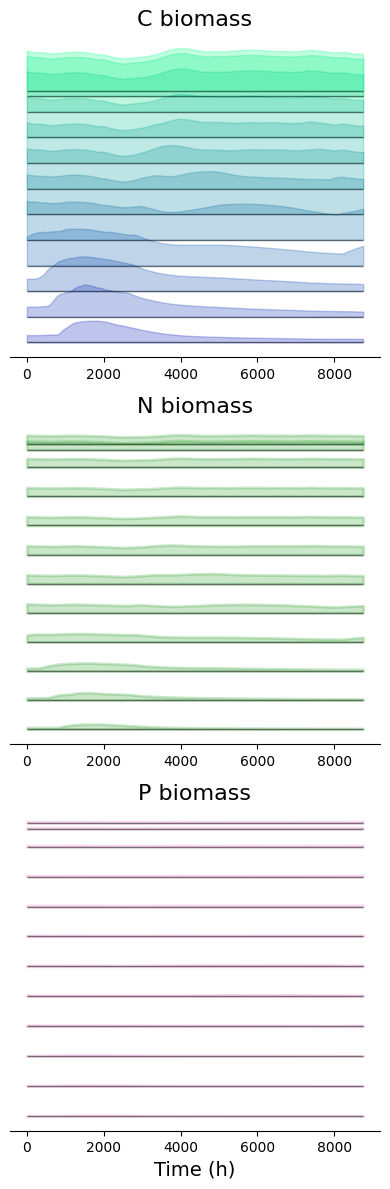

In [56]:
fig, (axC, axN, axP) = plt.subplots(3, 1, figsize=(4, 12))

def lerp_color(c1, c2, t):
    return (1 - t) * np.array(c1) + t * np.array(c2)

for i, depth in enumerate(-depths):
    theta = i / len(depths)

    # Baselines
    axC.hlines(depth/100, 0, time[-1],
               color="k", linewidth=1, alpha=0.5)
    axN.hlines(depth/100, 0, time[-1], color="k", linewidth=1, alpha=0.5)
    axP.hlines(depth/100, 0, time[-1], color="k", linewidth=1, alpha=0.5)

    # Biomass
    axC.fill_between(time, depth/100, depth/100 + biomass_C[:, i], label=f"{depth} m",
                     color=lerp_color((0, 1, 0.5), (0, 0, 0.75), theta), alpha=0.25)
    axN.fill_between(time, depth/100, depth/100 + biomass_N[:, i], label=f"{depth} m",
                     linewidth=2, color="tab:green", alpha=0.25)
    axP.fill_between(time, depth/100, depth/100 + biomass_P[:, i], label=f"{depth} m",
                     linewidth=2, color="tab:pink", alpha=0.25)

axC.set_yticks([])
axN.set_yticks([])
axP.set_yticks([])

for spine in ["left", "right", "top"]:
    axC.spines[spine].set_visible(False)
    axN.spines[spine].set_visible(False)
    axP.spines[spine].set_visible(False)

axC.set_title("C biomass", fontsize=16)
axN.set_title("N biomass", fontsize=16)
axP.set_title("P biomass", fontsize=16)

axP.set_xlabel("Time (h)", fontsize=14)

fig.tight_layout()